# Jane Chinwuko
# Batch number: DS2307

# It is a Multi-classification problem when prediction is based on Region.
# It is a Regression problem when prediction is based on AveragePrice.

### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
#### Some relevant columns in the dataset:
###### •	Date - The date of the observation
###### •	AveragePrice - the average price of a single avocado
###### •	type - conventional or organic
###### •	year - the year
###### •	Region - the city or region of the observation
###### •	Total Volume - Total number of avocados sold
###### •	4046 - Total number of avocados with PLU 4046 sold
###### •	4225 - Total number of avocados with PLU 4225 sold
###### •	4770 - Total number of avocados with PLU 4770 sold


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [2]:
# loaded the dataset to a Pandas DataFrame
avocado = pd.read_csv('avocado.csv')


## Exploratory Data Analysis

In [3]:
#Viewing the first 10 rows of the dataset
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
#dropping the Unnamed column
avocado.drop("Unnamed: 0", axis=1,inplace=True)

We dropped the column because it is not relevant in our prediction since it represents the indexes,

In [5]:
# Viewing the dimensions of the array
avocado.shape

(18249, 13)

This dataset contains 18249 rows and 13 columns (made up of the independent and target variables)

In [6]:
#Viewing the columns present in the dataset
columns = avocado.columns
columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
#Displays the basic information about the columns in the dataset
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The datatypes present in our dataset are int64(3 variables), object(3 variables) and float64(9 variables).
Our Date is Object type and not the date type. We will need to change the type to date type.

In [8]:
#displaying the descriptive statistics of all the features in the dataset
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see that there are no missing values because our counts are same.

In [9]:
#displaying the descriptive statistics of our categorical variables
avocado.describe(include='object')

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


We have three object datatype columns. We shall be converting the Date column to date format.

In [10]:
#Converting date column to date format
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado.Month = avocado.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

We changed the date format and also separated the day and month. Two additional columns(Month and Day) where created. 

In [11]:
#Displays the basic information about the columns in the dataset
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  object        
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

After the conversion of date column, we now have int64(2 variables), object(3 variables) and float64(9 variables).
Our Date is Object type and not the date type. We will need to change the type to date type.

In [12]:
#Viewing the first 10 rows of the dataset
avocado.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,DEC,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,DEC,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,DEC,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,DEC,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NOV,29
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,NOV,22
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,NOV,15
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,NOV,8
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,NOV,1
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,OCT,25


We have now created a new column for month and day. Since we also have the year column, there wont be any need to the date column so we can drop it.

In [13]:
#dropping the date column
avocado.drop('Date',axis=1,inplace=True)

In [14]:
# Display the count of the types of avocados
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

The values of the two types of Avocado is close.

In [15]:
#This returns the count of unique occurrences in the AveragePrice column.
avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

202 of the Avocados has an average price of 1.15.

In [16]:
#This returns the count of unique occurrences in the year column.
avocado['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In 2017, 5722 avocados were sold. More were sold in 2017 and the sales reduced drastically in 2018.

## Data Visualization

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

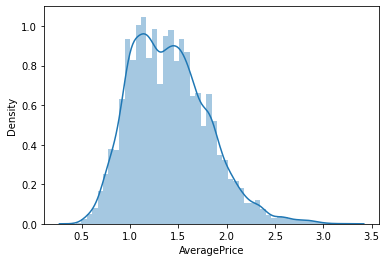

In [17]:
# displot showing average price
sns.distplot(avocado['AveragePrice'])

The Average price is our target variable and we can see that the distribution is almost normal although it's slightly skewed to the right.The average price varied between 0.5 and 2.5

<function matplotlib.pyplot.show(close=None, block=None)>

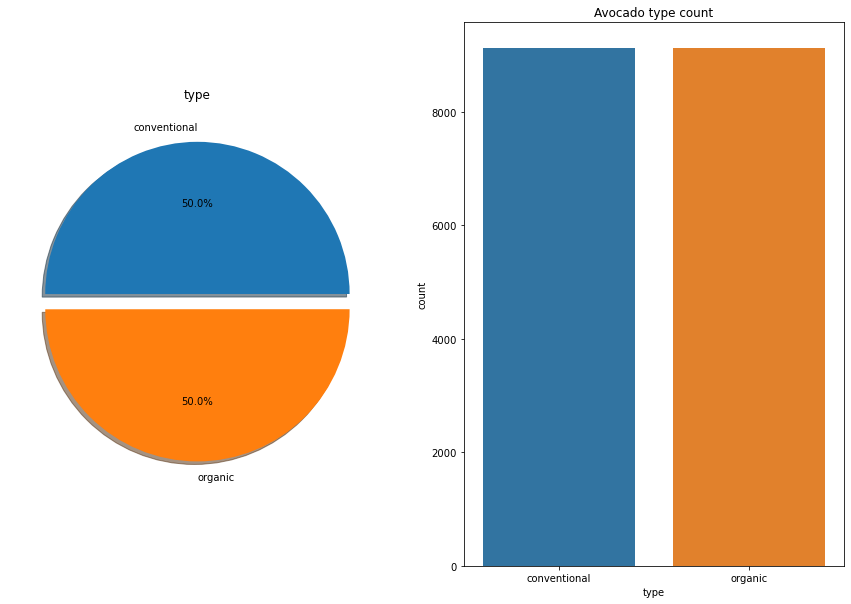

In [18]:
# This pieplot shows the percentage of the types of avocados
f, ax = plt.subplots(1,2, figsize = (15,10))
avocado['type'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('type')
ax[0].set_ylabel('')

# This countplot shows the distribution of the types of avocados
sns.countplot(x ='type', data = avocado,  ax = ax[1])
ax[1].set_title('Avocado type count')
plt.show

From the plots above, we can see that the Avocados grown organically and conventionally are distributed almost equally.

In [19]:
#This returns the count of unique occurrences in the region column.
avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

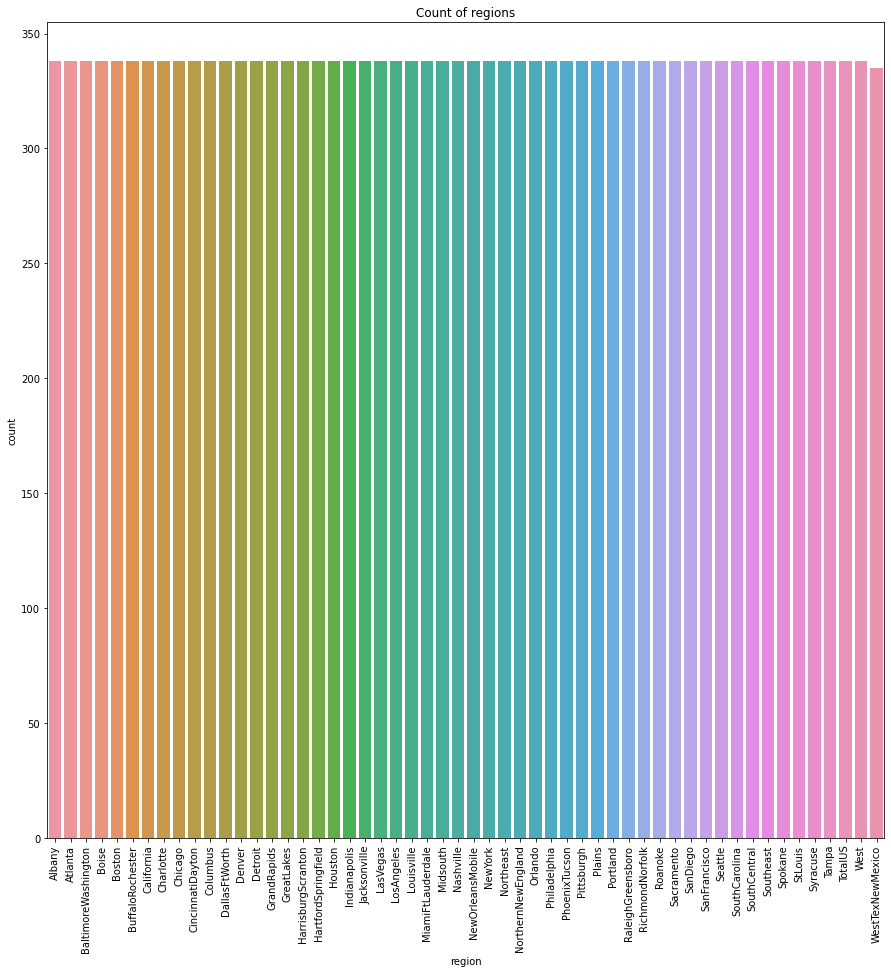

In [20]:
# countplot showing the regions
plt.figure(figsize=[15,15])
sns.countplot(x='region', data=avocado)
plt.title('Count of regions')
plt.xticks(rotation = 90)
plt.show()

We can see from the count plot of the region that the quantity of avocados from every region is distributed equally except for WestTexNewMexico which is slightly lower.

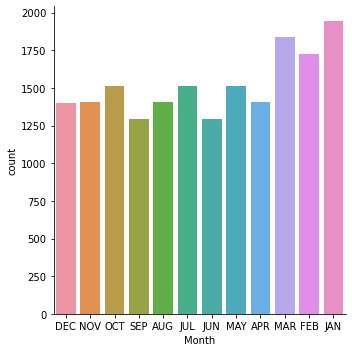

In [21]:
# This catplot shows the distribution of the sales per month.
sns.catplot(x ='Month', data = avocado, kind = 'count')

From the catplot above, we can see that there is an increase in avocado sales in January, February, and March.

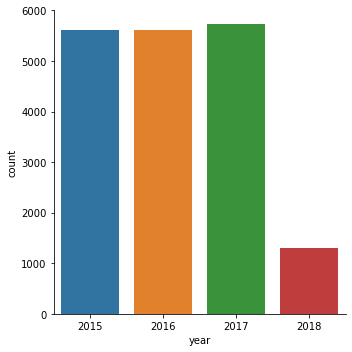

In [22]:
# This catplot shows the distribution of the sales per year.
sns.catplot(x ='year', data = avocado, kind = 'count')

There was a slight increase in the quantites sold in 2017. Less were sold in 2018.

<Figure size 720x720 with 0 Axes>

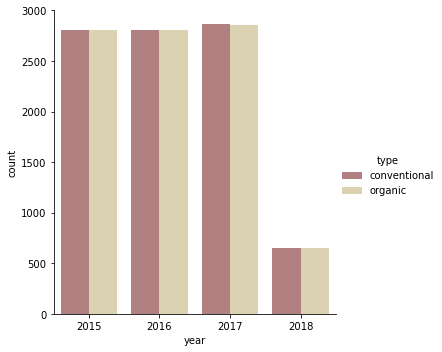

In [23]:
# This catplot shows the distribution of the types sold per year.
plt.figure(figsize=(10,10))
sns.catplot(x="year", kind="count",hue = 'type', palette="pink", data=avocado);

We have two types which are conventional and organic in relation to the years 2015, 2016, 2017, and 2018.The quantity of conventional and organic avocados is almost equal. We have less quantity in the year 2018.

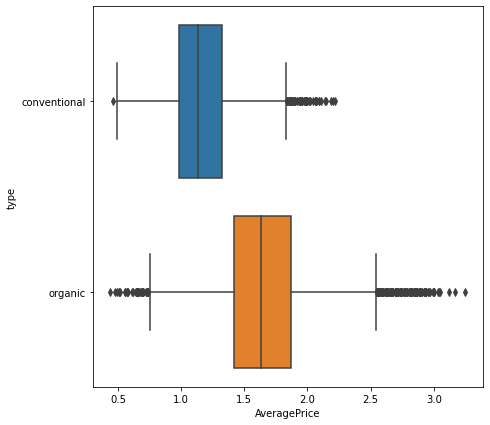

In [24]:
# This boxplot shows the distribution of the type of avocado by their average price.
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="AveragePrice", data=avocado);

From the boxplot above, we can see that the organic type cost more than the conventional types. we can attribut this to the fact the it cost more to cultivate organic crops than conventional.

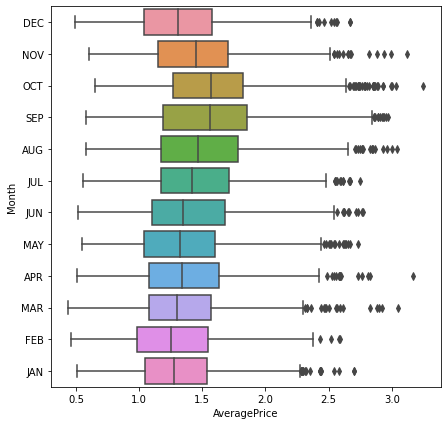

In [25]:
# This boxplot shows the distribution of the average price per month.
plt.figure(figsize=(7,7))
sns.boxplot(y="Month", x="AveragePrice", data=avocado);

From the boxplot, we can see that the months of August, September and October recorded the highest average price of Avocados. September had the highest average price. Outliers are present.

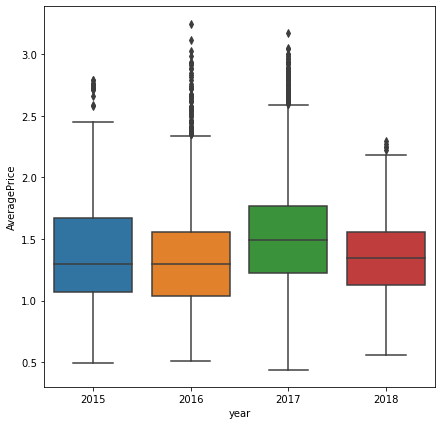

In [26]:
# This boxplot shows the distribution of the average price per year.
plt.figure(figsize=(7,7))
sns.boxplot(y="AveragePrice", x="year", data=avocado);

Checking the average price per year, we can see that Avocados cost slightly more in 2017. The highest value of the average price fell in 2018.

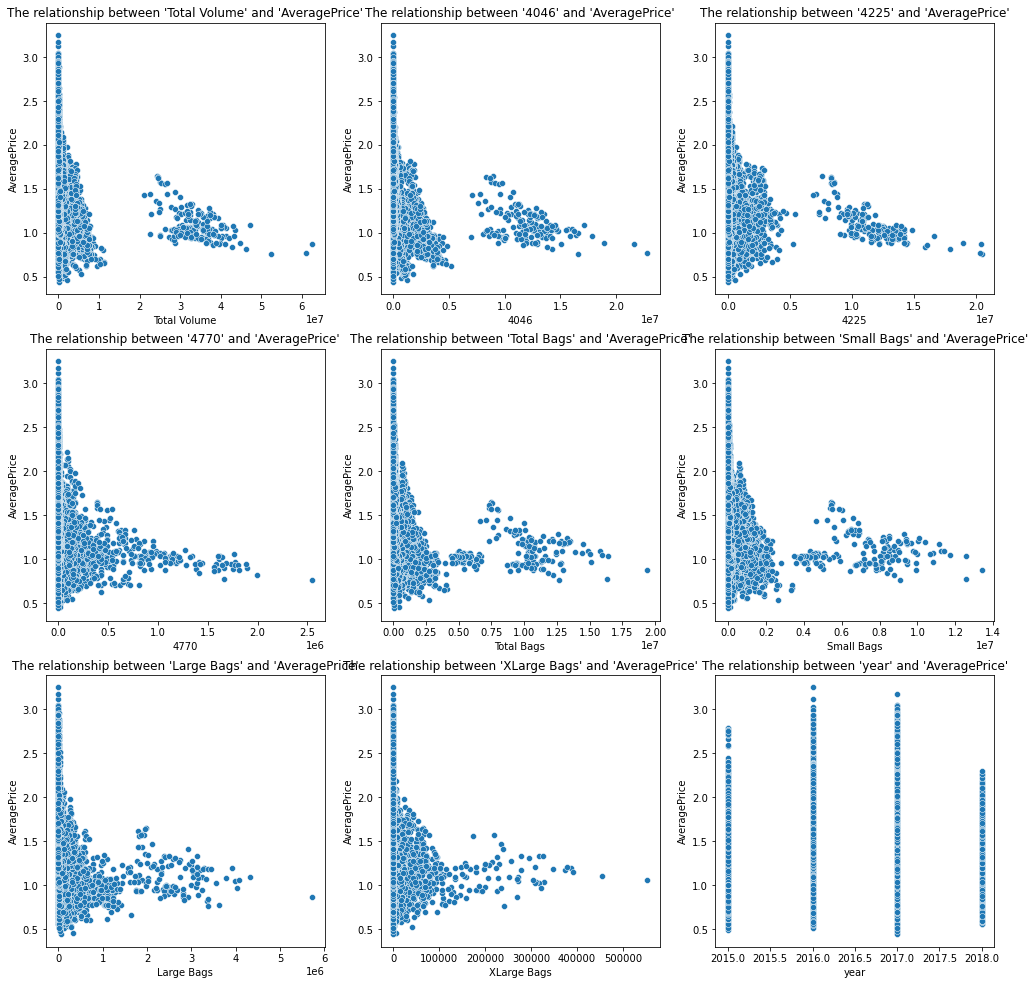

In [27]:
# These scatterplots are is used to visualize the relationships between variables against AveragePrice
fig, axes = plt.subplots(3, 3, figsize=(17, 17)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "Total Volume", y = "AveragePrice", data = avocado).set(title = "The relationship between 'Total Volume' and 'AveragePrice'");

sns.scatterplot(ax = axes[1], x = "4046", y = "AveragePrice", data = avocado).set(title = "The relationship between '4046' and 'AveragePrice'");

sns.scatterplot(ax = axes[2], x = "4225", y = "AveragePrice", data = avocado).set(title = "The relationship between '4225' and 'AveragePrice'");

sns.scatterplot(ax = axes[3], x = "4770", y = "AveragePrice", data = avocado).set(title = "The relationship between '4770' and 'AveragePrice'");

sns.scatterplot(ax = axes[4], x = "Total Bags", y = "AveragePrice", data = avocado).set(title = "The relationship between 'Total Bags' and 'AveragePrice'");

sns.scatterplot(ax = axes[5], x = "Small Bags", y = "AveragePrice", data = avocado).set(title = "The relationship between 'Small Bags' and 'AveragePrice'");

sns.scatterplot(ax = axes[6], x = "Large Bags", y = "AveragePrice", data = avocado).set(title = "The relationship between 'Large Bags' and 'AveragePrice'");

sns.scatterplot(ax = axes[7], x = "XLarge Bags", y = "AveragePrice", data = avocado).set(title = "The relationship between 'XLarge Bags' and 'AveragePrice'");

sns.scatterplot(ax = axes[8], x = "year", y = "AveragePrice", data = avocado).set(title = "The relationship between 'year' and 'AveragePrice'");

From the scatterplots, we can see that as the quantities increase, the average price decreases. More volumes will be sold when the price goes down.

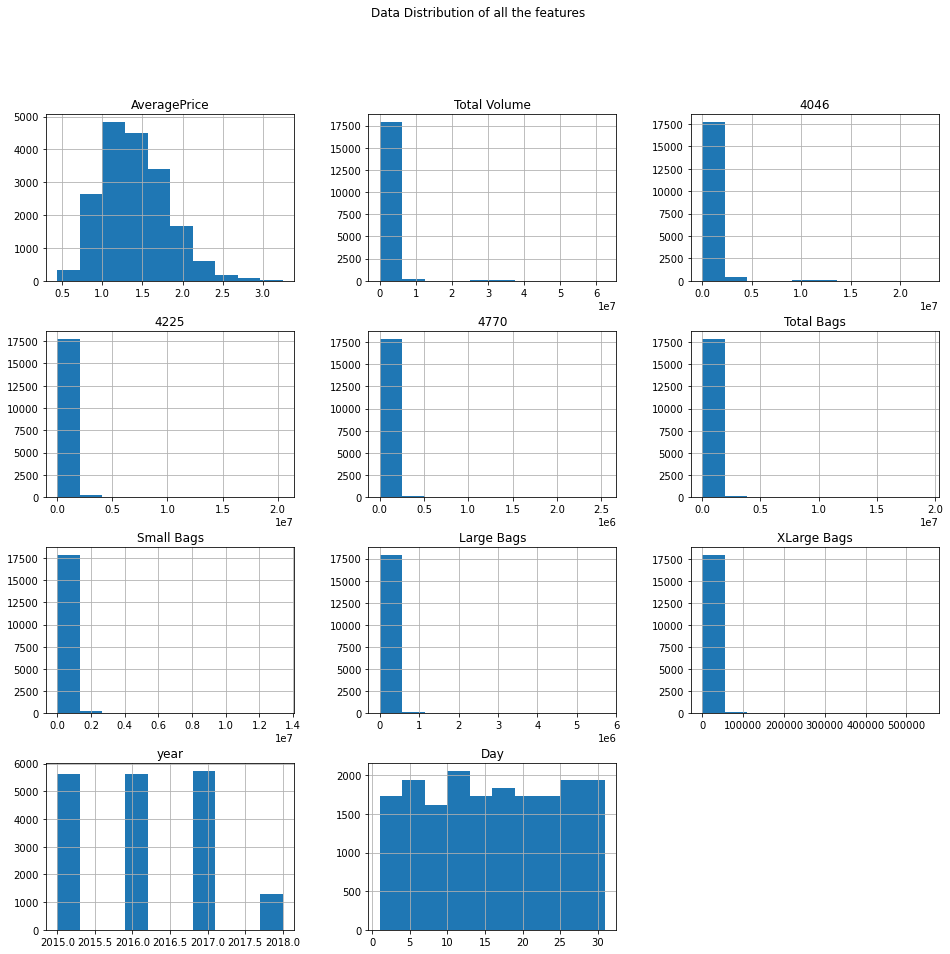

In [28]:
# Histogram containing all the columns
avocado.hist(bins=10, figsize=(16,15))
plt.suptitle("Data Distribution of all the features")
plt.show()

The data distribution of most of the features are skewed to the right. Average price is close to normal distribution although shows some skewness.

<Figure size 504x504 with 0 Axes>

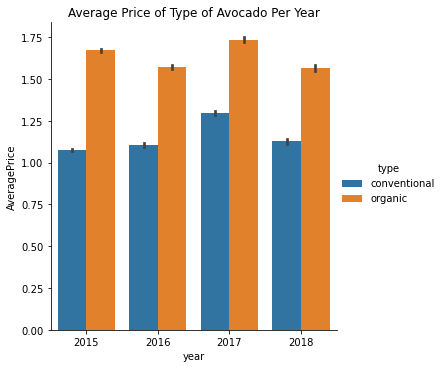

In [29]:
# catplot showing types of avocado, their average price per year
plt.figure(figsize=(7,7))
sns.catplot(x='year', y='AveragePrice', hue='type', data=avocado, kind = 'bar')
plt.title('Average Price of Type of Avocado Per Year')
plt.show()

When it comes to cost, organic avocados are more costly than conventional avocados. Avocados that were organic were most expensive in 2017 and least expensive in 2016. Whereas, Avocados that were conventional were most expensive in 2017 and least expensive in 2015

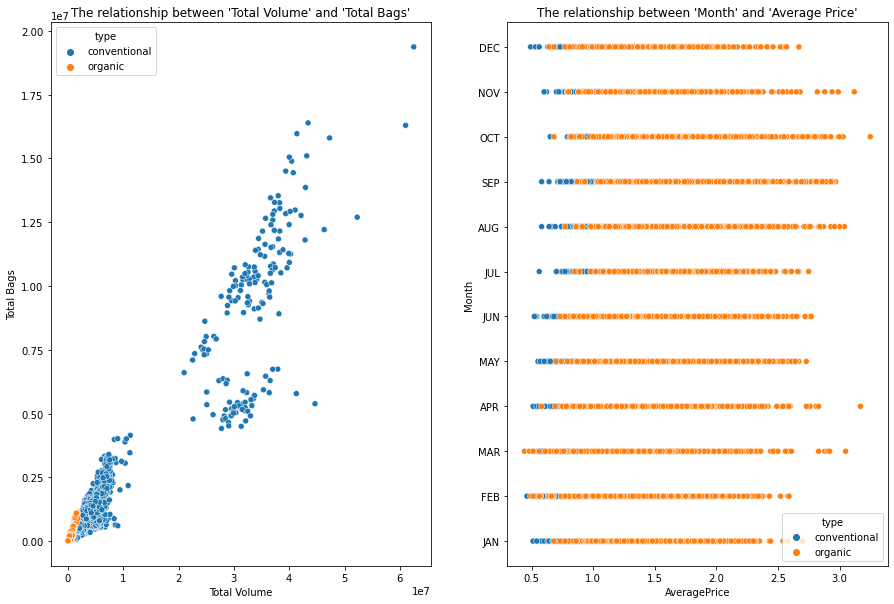

In [30]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(1, 2, figsize=(15, 10)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "Total Volume",
                y = "Total Bags", hue = "type",
                data = avocado).set(title = "The relationship between 'Total Volume' and 'Total Bags'");

sns.scatterplot(ax = axes[1],
                x = "AveragePrice",
                y = "Month", hue = "type",
                data = avocado).set(title = "The relationship between 'Month' and 'Average Price'");

The total number of bags will increase if more avocados of both varieties are sold overall. More of the conventional avocados were sold.
The second graph shows that the average price of conventional avocados is significantly smaller than that of organic avocados, but there doesn't appear to be a correlation between month and average price.

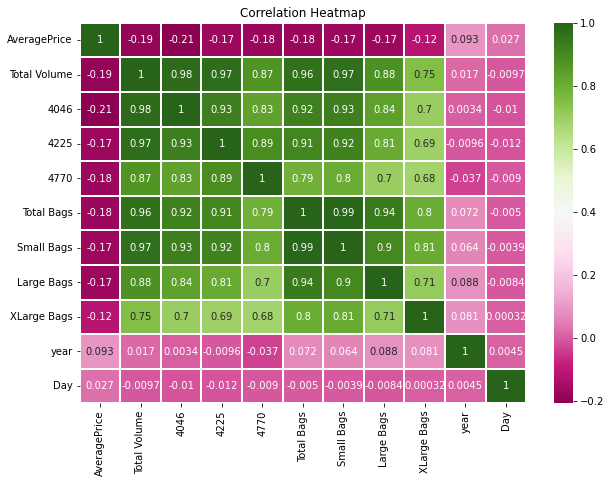

In [31]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(10,7))
sns.heatmap(avocado.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

The heatmap plot above shows that there is a strong correlation between Total Volume, 4046, 4225, 4770, Total Bags, Small bags, Large bags, and Xlarge bags. Averageprice, year and Day have low correlation with the other variables.

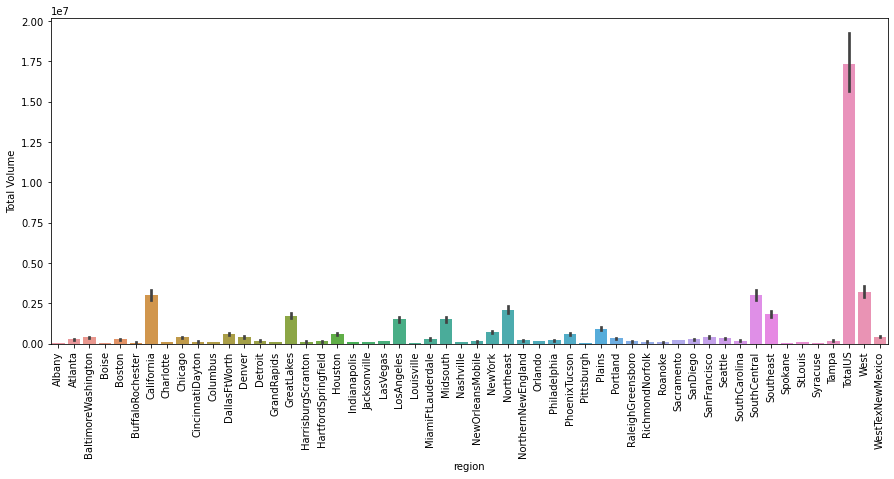

In [32]:
# barplot showing the relationship between region and Total Volume
plt.figure(figsize = (15,6))
sns.barplot(x = 'region',y='Total Volume',data = avocado)
plt.xticks(rotation = 90)
plt.show()

The region named TotalUS recorded the highest volume of sales, followed by the West, California, SouthCentral regions.

## Data Pre-proccessing

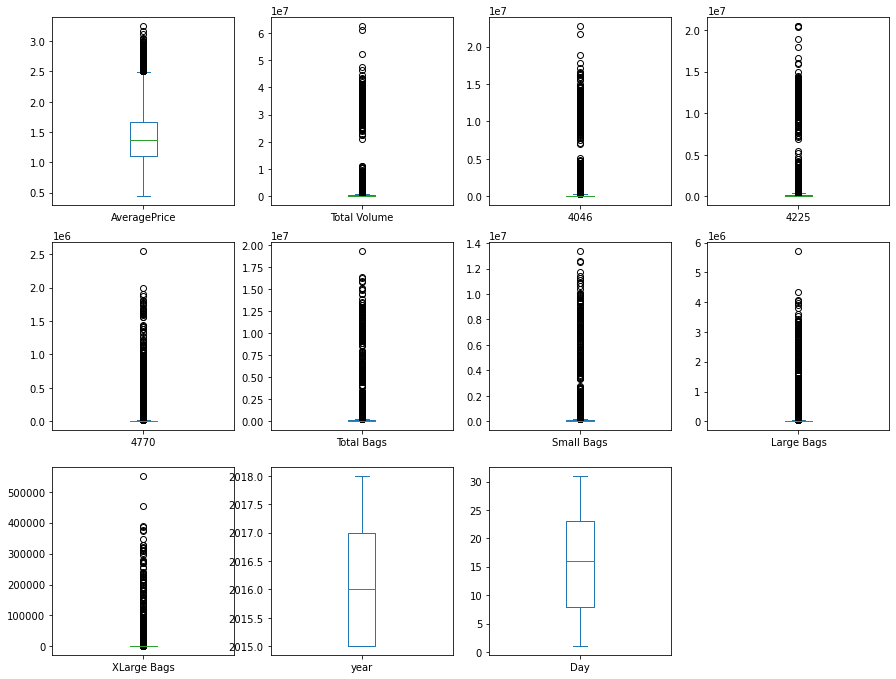

In [33]:
# using Boxplot to check for outliers
avocado.plot(kind = "box",subplots = True,layout = (5,4),figsize=(15,20)) 
plt.show()

We can see that there are some outliers in our data.

In [34]:
# selected columns to check for outliers
columns = ['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags']

# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = avocado[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = avocado[column].quantile(0.75)

    # get the column minimum and median values
    min_value = avocado[column].min()
    median_value = avocado[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for wine_red
    arr1 = avocado[column]

    # Get the outliers in the columns using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        avocado.loc[(avocado[column] <= lower_bound), column] = lower_bound
        avocado.loc[(avocado[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        avocado.loc[(avocado[column] <= lower_bound), column] = median_value
        avocado.loc[(avocado[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,AveragePrice,209,2,1.15
1,Total Volume,2297,1067498,12.59
2,4046,2518,277305,13.80
3,4225,2519,371087,13.80
4,4770,2918,15610,15.99
5,Total Bags,2533,269397,13.88
6,Small Bags,2407,204097,13.19
7,Large Bags,2707,54886,14.83
8,XLarge Bags,4014,332,22.00


From the above, we checked and displayed the number of outliers present in our dataset. If these outliers are removed, it will reduce the dimension of our dataset greatly. 

We treated them by:
##### 1) Replacing outlier values with the median value if the percentage value is greater than 5%. 
##### 2) Capping the Outliers using IQR Ranges if the percentage value is less than 5%.

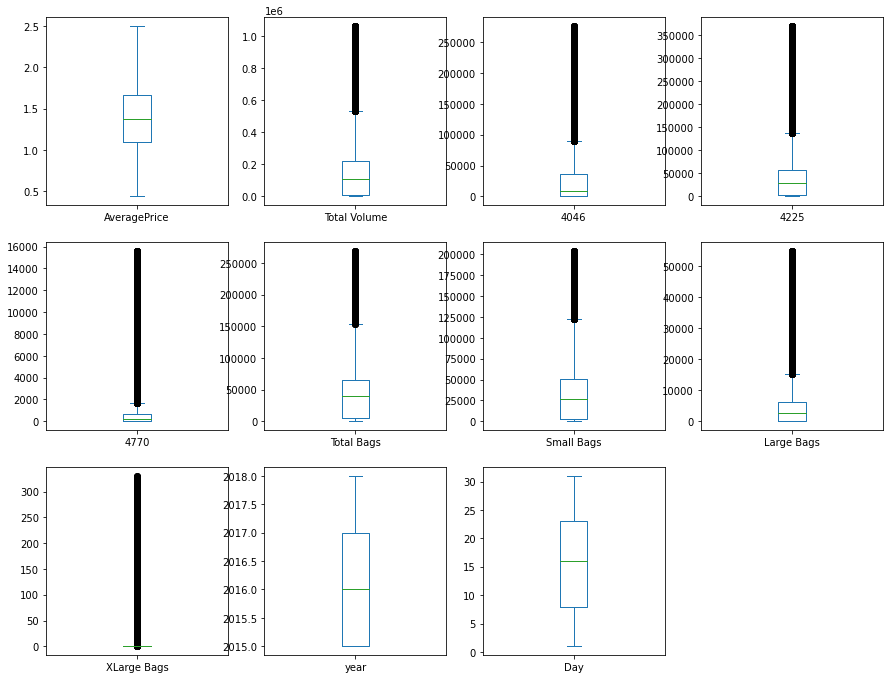

In [35]:
#Boxplot showing outliers removal
avocado.plot(kind = "box",subplots = True,layout = (5,4),figsize=(15,20))
plt.show()

The outliers have been treated.

In [36]:
# Printing the total number of duplicates across all the columns
duplicated = avocado.duplicated()

print("The number of duplicates in the dataset is:", avocado.duplicated().sum())

The number of duplicates in the dataset is: 0


There are no duplicates in our dataset.

In [37]:
#checking for missing values
avocado.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

No missing values in out dataset

In [38]:
#Converting our type, region and month columns to dummy variables 
avocado_new = pd.get_dummies(avocado,columns=['type','region','Month'])
avocado_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,1,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,0,0,1,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,1,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,1,0,0,0,0,0,0,0


We are making our categorical columns to have numerical values by converting them to dummy variables. A dummy variable is one that is used to give categorical variable levels a numerical value.

In [39]:
# splitting our data into X(Independant variables) and y(target variable)
X = avocado_new.drop('AveragePrice',axis=1)
y = avocado_new.AveragePrice

In [40]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Day,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,-0.462637,-0.566945,0.038187,-0.439433,-0.711964,-0.635402,-0.579418,-0.243301,-1.221282,1.291857,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
1,-0.504245,-0.573456,-0.089266,-0.436257,-0.696561,-0.615304,-0.579039,-0.243301,-1.221282,0.494231,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
2,-0.222653,-0.571292,0.748354,-0.413717,-0.722469,-0.649428,-0.578535,-0.243301,-1.221282,-0.303396,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
3,-0.397041,-0.565234,0.265690,-0.431806,-0.766927,-0.708509,-0.575798,-0.243301,-1.221282,-1.101022,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
4,-0.521304,-0.568656,-0.099658,-0.430807,-0.759826,-0.700792,-0.570084,-0.243301,-1.221282,1.519750,...,-0.288589,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,3.463793,-0.300564,-0.27649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.672294,-0.548798,-0.649008,-0.454473,-0.620507,-0.523896,-0.549155,-0.243301,1.970504,-1.328915,...,-0.288589,3.092048,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18245,-0.686461,-0.564161,-0.624308,-0.454473,-0.701146,-0.626997,-0.558723,-0.243301,1.970504,1.405803,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18246,-0.687000,-0.564157,-0.637016,-0.227133,-0.698684,-0.616710,-0.583971,-0.243301,1.970504,0.608177,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18247,-0.676160,-0.558127,-0.630157,-0.227424,-0.668678,-0.577542,-0.583284,-0.243301,1.970504,-0.189449,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649


# Model Building

In [41]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12774, 78), (5475, 78), (12774,), (5475,))

We are splitting our dataset into train and test. We are going to use 70% of our data to train the models and use 30% to validate the performance of our model. 
We have 14599 rows of data in our training. 3650 data will be used for validation. We have 78 independent variables because of the dummy variables created.

# Regression Task using Average price as target variable

## 1. Random Forest Regressor

In [42]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.09800792694063927
mean_squared_error  :  0.01825693008219178
root_mean_absolute_error 0.1351182078115003
R2_score            :  0.8828786019624835
R2_score on training data :  0.9831251193099




### Cross Validation Score for Random Forest Regressor

In [43]:
cv_score1 = cross_val_score(random_for,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score1.mean()}')

[0.80682616 0.78402387 0.82769746 0.80976974 0.80964546]
0.8075925376819176
The difference between the R2 score and the cross validation score is: 0.07528606428056583


## 2. Gradient Boosting Regressor

In [44]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')


mean_absolute_error :  0.16293303579073337
mean_squared_error  :  0.043941400087849074
root_mean_absolute_error 0.20962204103540513
R2_score            :  0.718108236880705
R2_score on training data :  0.739531074180751




### Cross Validation Score for Gradient Boosting Regressor

In [45]:
cv_score = cross_val_score(gb,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score.mean()}')

[0.70137023 0.69510069 0.73228916 0.72976653 0.71159866]
0.7140250533756777
The difference between the R2 score and the cross validation score is: 0.0040831835050273435


## 3. Decision Tree Regressor

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
ypred_dc = dec_tree.predict(X_test)
train_preddc = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  0.13290776255707762
mean_squared_error  :  0.038781753424657534
root_mean_absolute_error 0.19693083411354742
R2_score            :  0.7512082722016517
R2_score on training data :  1.0




### Cross Validation Score Decision Tree Regressor

In [47]:
cv_score2 = cross_val_score(dec_tree,x,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')

[-0.64502257  0.21663895  0.24975414 -0.29749414 -0.18120258]
-0.1314652391723588
The difference between the R2 score and the cross validation score is: 0.8826735113740105


## 4. Linear Regression

In [48]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  0.1845176236697242
mean_squared_error  :  0.057197769667073094
root_mean_absolute_error 0.23916055207135037
R2_score            :  0.6330663086358701
R2_score on training data :  0.6455921315483827




### Cross Validation Score for Linear Regression

In [49]:
cv_score3 = cross_val_score(lin_regre,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score3.mean()}')

[0.61213975 0.61357948 0.63925565 0.65527281 0.61381525]
0.6268125865995575
The difference between the R2 score and the cross validation score is: 0.006253722036312581


## 5. Ridge

In [50]:
#Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.5)
Ridge.fit(X_train, y_train)
ypred_rd = Ridge.predict(X_test)
train_predrd = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.18451638000623416
mean_squared_error  :  0.05719912679397508
root_mean_absolute_error 0.23916338932615727
R2_score            :  0.6330576024295496
R2_score on training data :  0.6455920540924454




### Cross Validation Score for Ridge

In [51]:
cv_score4 = cross_val_score(Ridge,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')

[0.61213684 0.61357168 0.63919726 0.65507369 0.61378766]
0.6267534255307335
The difference between the R2 score and the cross validation score is: 0.006304176898816016


In [52]:
from sklearn.model_selection import GridSearchCV

model_best = GradientBoostingRegressor()

parameters = {
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [10, 500, 1000],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    }

In [53]:
gd_search = GridSearchCV(model_best, parameters, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 500, 1000],
                         'subsample': [0.8, 0.9, 1.0]})

In [54]:
#display the best parameters from the search
print("The best learning_rate is : " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best subsample: " + str(gd_search.best_params_["subsample"]))

The best learning_rate is : 0.05 
The best n_estimators: 1000 
The best max_depth: 7 
The best subsample: 0.8


In [55]:
# train the model with the selected parameters
New_model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators  = 1000, max_depth = 7, subsample = 0.8)

In [56]:
New_model.fit(X_train, y_train)

y_pred = New_model.predict(X_test)
train_predrd = New_model.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')


mean_absolute_error :  0.08180784839437891
mean_squared_error  :  0.012335078393391864
root_mean_absolute_error 0.11106339808141953
R2_score            :  0.9208683157665366
R2_score on training data :  0.9903914157666955




In [57]:
import pickle
# save the model to disk
filename = 'avocado.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [58]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.9208683157665366

In [59]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
Predicted,0.857268,0.997186,1.395421,0.941854,1.399052,1.328606,1.996888,0.929359,2.32436,1.706894,...,2.330065,1.288914,1.397106,1.153307,1.517744,1.741652,1.0641,2.195223,1.753277,1.260542
Original,0.820000,0.970000,1.440000,0.970000,1.450000,1.290000,2.030000,0.940000,2.45000,1.830000,...,2.490000,1.270000,1.530000,1.110000,1.580000,1.640000,0.9400,2.500000,1.860000,1.250000


# Classification Model using Region as target variable

In [60]:
#Converting our type and month columns to dummy variables 
avocado_new1 = pd.get_dummies(avocado,columns=['type','Month'])
avocado_new1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,1,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,0,0,1,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,1,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,1,0,0,0,0,0,0,0


In [61]:
#nEncoding the column region
from sklearn.preprocessing import LabelEncoder
Region_encode=LabelEncoder()
avocado_new1['region']=Region_encode.fit_transform(avocado_new1['region'])
avocado_new1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,1,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,1,0,0


In [62]:
# splitting our data into X(Independant variables) and y(target variable)
X=avocado_new1.drop(['region'],axis=1)
y=avocado_new1.region

In [63]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [64]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,-0.186305,-0.462637,-0.566945,0.038187,-0.439433,-0.711964,-0.635402,-0.579418,-0.243301,-1.221282,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
1,-0.135726,-0.504245,-0.573456,-0.089266,-0.436257,-0.696561,-0.615304,-0.579039,-0.243301,-1.221282,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
2,-1.197899,-0.222653,-0.571292,0.748354,-0.413717,-0.722469,-0.649428,-0.578535,-0.243301,-1.221282,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
3,-0.818551,-0.397041,-0.565234,0.265690,-0.431806,-0.766927,-0.708509,-0.575798,-0.243301,-1.221282,...,3.465130,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
4,-0.312755,-0.521304,-0.568656,-0.099658,-0.430807,-0.759826,-0.700792,-0.570084,-0.243301,-1.221282,...,-0.288589,-0.323410,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,3.463793,-0.300564,-0.27649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.572389,-0.672294,-0.548798,-0.649008,-0.454473,-0.620507,-0.523896,-0.549155,-0.243301,1.970504,...,-0.288589,3.092048,-0.345293,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18245,0.774708,-0.686461,-0.564161,-0.624308,-0.454473,-0.701146,-0.626997,-0.558723,-0.243301,1.970504,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18246,1.179345,-0.687000,-0.564157,-0.637016,-0.227133,-0.698684,-0.616710,-0.583971,-0.243301,1.970504,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649
18247,1.331084,-0.676160,-0.558127,-0.630157,-0.227424,-0.668678,-0.577542,-0.583284,-0.243301,1.970504,...,-0.288589,-0.323410,2.896091,-0.300564,-0.27626,-0.334459,-0.300564,-0.288701,-0.300564,-0.27649


In [65]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14599, 25), (3650, 25), (14599,), (3650,))

## 1. Random Forest

In [66]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.85


[[60  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  0  2]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  3  0]
 [ 0  0  0 ...  8 35  0]
 [ 0  0  0 ...  0  0 52]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.84      0.85      0.84        73
           2       0.98      0.98      0.98        61
           3       0.87      0.86      0.87        72
           4       0.91      0.96      0.93        67
           5       0.86      0.84      0.85        73
           6       0.67      0.74      0.70        62
           7       0.95      0.82      0.88        76
           8       0.96      0.94      0.95        72
           9       0.94      0.89      0.91        65
          10       0.86      0.75      0.80        65
          11       0.95      0.93      0.94        68
          12       0.92      0.94      0.93        65
          13       0

#### Cross Validation Score for Random Forest

In [67]:
results = []

scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.83424658 0.83184932 0.84452055 0.84589041 0.84480987]
Mean accuracy: 0.84


The difference between the accuracy score and the cross validation score is: 0.008503780146137507


## 2. Decision Tree

In [68]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)


The Accuracy for Decision Tree: 0.72


[[50  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  2]
 [ 0  0 56 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  5  0]
 [ 0  0  0 ...  8 36  0]
 [ 0  2  3 ...  0  0 39]]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        63
           1       0.62      0.59      0.61        73
           2       0.80      0.92      0.85        61
           3       0.84      0.86      0.85        72
           4       0.87      0.90      0.88        67
           5       0.63      0.71      0.67        73
           6       0.63      0.71      0.67        62
           7       0.90      0.72      0.80        76
           8       0.85      0.94      0.89        72
           9       0.77      0.75      0.76        65
          10       0.63      0.68      0.65        65
          11       0.88      0.74      0.80        68
          12       0.86      0.77      0.81        65
          13       0.55

### Cross Validation Score for Decision Tree

In [69]:
# Specify the cross-validation strategy

scores1 = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores1)

# Calculate and print the mean of the scores
mean_score = scores1.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.71883562 0.72054795 0.72226027 0.71917808 0.71805413]
Mean accuracy: 0.72


The difference between the accuracy score and the cross validation score is: 0.0037864346487583855


## 3. Support Vector Machines (SVM)

In [70]:
from sklearn import svm

svm = svm.SVC(decision_function_shape = 'ovo')
svm.fit(X_train, y_train)
prediction_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, prediction_svm)
# Display a classification report for more detailed metrics
print(f"The Accuracy for SVM is: ", accuracy)
print('\n')

print(confusion_matrix(y_test, prediction_svm))
print(classification_report(y_test, prediction_svm))

The Accuracy for SVM is:  0.350958904109589


[[30  0  0 ...  0  0  0]
 [ 7 21  1 ...  0  0  2]
 [ 3  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  2  0]
 [ 0  0  0 ...  8 19  0]
 [ 6  0  0 ...  0  0 23]]
              precision    recall  f1-score   support

           0       0.10      0.48      0.16        63
           1       0.68      0.29      0.40        73
           2       0.82      0.54      0.65        61
           3       0.76      0.39      0.51        72
           4       0.72      0.39      0.50        67
           5       0.32      0.29      0.30        73
           6       0.41      0.58      0.48        62
           7       0.75      0.20      0.31        76
           8       0.77      0.51      0.62        72
           9       0.60      0.42      0.49        65
          10       0.29      0.22      0.25        65
          11       0.29      0.22      0.25        68
          12       0.60      0.28      0.38        65
          13       0.46      0.27      0.

#### Cross Validation Score for Support Vector Machines

In [71]:

scores2 = cross_val_score(svm, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores2)

# Calculate and print the mean of the scores
mean_score = scores2.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Support Vector Machine',accuracy, mean_score, diff])

Cross-validation scores: [0.32089041 0.32226027 0.32089041 0.32157534 0.32476876]
Mean accuracy: 0.32


The difference between the accuracy score and the cross validation score is: 0.028881865153669584


## 4. Xgboost Classifier

In [72]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.8312328767123288


[[58  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  1]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  3  0]
 [ 0  0  0 ...  8 36  0]
 [ 0  0  0 ...  0  0 52]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.74      0.82      0.78        73
           2       0.94      0.98      0.96        61
           3       0.87      0.86      0.87        72
           4       0.88      0.90      0.89        67
           5       0.79      0.82      0.81        73
           6       0.68      0.76      0.72        62
           7       0.91      0.84      0.88        76
           8       0.94      0.93      0.94        72
           9       0.88      0.89      0.89        65
          10       0.84      0.74      0.79        65
          11       0.93      0.94      0.93        68
          12       0.89      0.83      0.86        65


#### Cross Validation Score for Xgboost Classifier

In [73]:

scores3 = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores3)

# Calculate and print the mean of the scores
mean_score = scores3.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.81815068 0.80924658 0.82226027 0.83287671 0.82562521]
Mean accuracy: 0.82


The difference between the accuracy score and the cross validation score is: 0.009600984574375637


## 5. Gradient Boosting Classifier

In [74]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.7682191780821918


[[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  2]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  3  0]
 [ 0  0  0 ...  8 34  0]
 [ 0  0  0 ...  0  0 49]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        63
           1       0.69      0.75      0.72        73
           2       0.92      0.93      0.93        61
           3       0.88      0.79      0.83        72
           4       0.85      0.82      0.83        67
           5       0.71      0.77      0.74        73
           6       0.71      0.71      0.71        62
           7       0.85      0.74      0.79        76
           8       0.93      0.86      0.89        72
           9       0.80      0.82      0.81        65
          10       0.75      0.71      0.73        65
          11       0.79      0.85      0.82        68
          12       0.89      0.75      0.82 

### Cross Validation Score for Gradient Boosting Classifier

In [75]:

scores4 = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores4)

# Calculate and print the mean of the scores
mean_score = scores4.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.76335616 0.75273973 0.76917808 0.77123288 0.75573827]
Mean accuracy: 0.76


The difference between the accuracy score and the cross validation score is: 0.00577015491325128


In [76]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Random Forest,0.848767,0.840263,0.008504
1,Decision Tree,0.723562,0.719775,0.003786
2,Support Vector Machine,0.350959,0.322077,0.028882
3,Xgboost Classifier,0.831233,0.821632,0.009601
4,Gradient Boosting Classifier,0.768219,0.762449,0.005770


In [77]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Decision Tree


### Best Model Selection
Selection of the best model was based on the difference between the accuracy and cross validation score

### Fine-Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

model_best = DecisionTreeClassifier()

model_param = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [79]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [80]:
#display the best parameters from the search

print("\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best min_samples_leaf: " + str(gd_search.best_params_["min_samples_leaf"]),
      "\nThe best criterion: " + str(gd_search.best_params_["criterion"]))


The best max_depth: 20 
The best min_samples_leaf: 5 
The best criterion: entropy


In [82]:
# train the model with the selected parameters
best_model = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5, criterion = 'entropy')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7123287671232876

In [83]:
import pickle
# save the model to disk
filename = 'Avocado_class.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [84]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
accuracy_dataframe

,y_test,y_pred
8604,10,10
2608,50,50
14581,50,50
4254,27,27
16588,34,34
...,...,...
15956,22,22
12471,10,10
4574,33,33
16359,30,30


In [85]:
#This will revert the encoding done for the region column
accuracy_dataframe['y_test']= Region_encode.inverse_transform(accuracy_dataframe['y_test'])
accuracy_dataframe['y_pred']= Region_encode.inverse_transform(accuracy_dataframe['y_pred'])
accuracy_dataframe

,y_test,y_pred
8604,Columbus,Columbus
2608,Tampa,Tampa
14581,Tampa,Tampa
4254,NewOrleansMobile,NewOrleansMobile
16588,Pittsburgh,Pittsburgh
...,...,...
15956,LosAngeles,LosAngeles
12471,Columbus,Columbus
4574,PhoenixTucson,PhoenixTucson
16359,NorthernNewEngland,NorthernNewEngland


## Conclusion

We used the Avocado dataset in this project to analyse and visualize the relationships between the features in our data. This dataset contains The dataset is made up 18249 rows and 13 columns (12 independent and 1 target variables). For this project, we looked at this dataset in two angles:
##### 1) As a regression problem-- We used the average price as our target variable and made predictions.
This is a regression project because the target variable contains continuous data. We used different regression algorithms to train our model. 70% of the data was used for training while 30% was used for validation. In this project, we used the avocado dataset to analyse and predicts the Average Price (of avocados). We visualized the relationships between some features. We discovered after evaluating this data that there are two varieties of avocados: conventional and organic. Despite numerous variations, the same quantity has been sold. Organic products had an average price that was higher, but conventional products' total volume was far more than organic's. The average price varied between 0.5 and 2.5; the highest value of the average price fell in 2018 and the average price was higher than typical in 2017. Regarding the months, the highest price was recorded in the month of September. Model selection for this project was based on the difference between the r2 score and the cross validation score. Model with the smallest result of the subtraction was selected as the model for our predictions. After training with different models, GradientBoosting Regressor was our best model. We tuned the model using Grid search best parameters. There was an improvement in the r2 score; from 0.718108 to 0.920868.

##### 2) As a multi-classification problem-- We used the region as target variable and also made predications.
We saw from the count plot of the region that the quantity of avocados from every region is distributed equally except for WestTexNewMexico which is slightly lower. We used different classification algorithms to train our model. 80% of the data was used for taining while 20% was used for validation.
Decision Tree Classifier is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.723562 and after tuning with set parameters, there was no improvement in the accuracy score 0.7123287. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict all classes correctly. To improve the accuracy score further, we will need to tune the model with other parameters.